In [1]:
%matplotlib inline
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sys
sys.path.append("..") # Adds higher directory to python modules path.  
import seaborn as sns
import os.path
from scipy.stats import ttest_ind
import missingno as msno

fixing datatype issues in the sources

# Importing the flat file

In [2]:
conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=DESKTOP-PFMG0IP\SQLEXPRESS;"
                      "Database=NoShow;"
                      "Trusted_Connection=yes;")

In [3]:
# check if file exists
if os.path.exists('NoShow_ff.csv'):
    NoShow_ff = pd.read_csv('NoShow_ff.csv',index_col=0)
else:
    # Get the V_ff table
    NoShow_ff = pd.read_sql("SELECT * FROM V_ff;",conn)
    # save to csv
    NoShow_ff.to_csv('NoShow_ff.csv')

In [4]:
NoShow_ff.describe(include='all')

,Date_CD,Year,Season,WeekEnd,LastYear,LastSeason,LastWeekEnd,Date,LastDate,DaysRecency,...,CancelDay,CancelWeekday,CanceledBy,Days,LastIsCanceled,LastCanceledBy,LastCancelWeekday,TotalClientCancellationsTillNow,TotalClientBookingsTillNow,CancellationPcnt
count,2.764000e+03,2764.000000,2764,2764.000000,1942.000000,1942,1942.000000,2764,1942,1942.000000,...,389.000000,389.000000,360,377.000000,1942.000000,288,313.000000,1942.000000,2764.000000,1942.000000
unique,NaN,NaN,4,NaN,NaN,4,NaN,178,164,NaN,...,NaN,NaN,7,NaN,NaN,7,NaN,NaN,NaN,NaN
top,NaN,NaN,Summer,NaN,NaN,Summer,NaN,2018-06-30,2018-06-30,NaN,...,NaN,NaN,JJ,NaN,NaN,JJ,NaN,NaN,NaN,NaN
freq,NaN,NaN,1323,NaN,NaN,907,NaN,66,56,NaN,...,NaN,NaN,141,NaN,NaN,126,NaN,NaN,NaN,NaN
mean,2.018064e+07,2018.000724,NaN,0.438495,2018.000515,NaN,0.432029,NaN,NaN,27.842430,...,15.696658,4.514139,NaN,5.952255,0.161174,NaN,4.338658,1.247168,4.645441,0.134367
std,3.418682e+02,0.026895,NaN,0.496292,0.022692,NaN,0.495486,NaN,NaN,41.569045,...,8.846661,1.565719,NaN,11.708464,0.367786,NaN,1.533914,2.656281,6.781757,0.235189
min,2.018010e+07,2018.000000,NaN,0.000000,2018.000000,NaN,0.000000,NaN,NaN,0.000000,...,1.000000,1.000000,NaN,-37.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000
25%,2.018052e+07,2018.000000,NaN,0.000000,2018.000000,NaN,0.000000,NaN,NaN,0.000000,...,8.000000,3.000000,NaN,0.000000,0.000000,NaN,3.000000,0.000000,0.000000,0.000000
50%,2.018062e+07,2018.000000,NaN,0.000000,2018.000000,NaN,0.000000,NaN,NaN,8.000000,...,17.000000,5.000000,NaN,2.000000,0.000000,NaN,4.000000,0.000000,2.000000,0.000000
75%,2.018072e+07,2018.000000,NaN,1.000000,2018.000000,NaN,1.000000,NaN,NaN,40.000000,...,24.000000,6.000000,NaN,7.000000,0.000000,NaN,5.000000,1.000000,6.000000,0.214286


In [5]:
NoShow_ff.dtypes

Date_CD                              int64
Year                                 int64
Season                              object
WeekEnd                              int64
LastYear                           float64
LastSeason                          object
LastWeekEnd                        float64
Date                                object
LastDate                            object
DaysRecency                        float64
ClientType                          object
Staff                               object
BLastStaff                          object
RTLastStaff                         object
StaffCancType                       object
BLastServiceCode                    object
BLastWomenMenService                object
BLastColorCutService                object
LastServiceCategory                 object
LastServicePrice                   float64
LastServiceCost                    float64
ServiceCode                         object
ServiceCancType                     object
WomenMenSer

# Converting variables

In [6]:
category_cols = ['Year','Season', 'WeekEnd','LastYear','LastSeason','LastWeekEnd',
                'ClientType','Staff','StaffCancType','BLastStaff','RTLastStaff',
                'BLastServiceCode','BLastWomenMenService','BLastColorCutService','LastServiceCategory',
                'ServiceCode','WomenMenService','ColorCutService','ServiceCategory','ServiceCancType',
                'RTLastWomenMen','RTLastColorCutReciept','WasProdPerch',
                'IsCanceled','CancelDay','CancelWeekday','CanceledBy','LastIsCanceled','LastCanceledBy',
                'LastCancelWeekday']

numeric_cols = ['LastServicePrice','LastServiceCost','ServicePrice','ServiceCost',
                'LastTotalAmount','LastTotalGST','LastTotalPST','Days', 'DaysRecency',
                'TotalClientCancellationsTillNow','TotalClientBookingsTillNow','CancellationPcnt']

In [7]:
for col,val in NoShow_ff.items():
    if col in category_cols:
        NoShow_ff[col]= NoShow_ff[col].astype('category')
    if col in numeric_cols:
        NoShow_ff[col]= NoShow_ff[col].astype('float64')

In [8]:
NoShow_ff.dtypes

Date_CD                               int64
Year                               category
Season                             category
WeekEnd                            category
LastYear                           category
LastSeason                         category
LastWeekEnd                        category
Date                                 object
LastDate                             object
DaysRecency                         float64
ClientType                         category
Staff                              category
BLastStaff                         category
RTLastStaff                        category
StaffCancType                      category
BLastServiceCode                   category
BLastWomenMenService               category
BLastColorCutService               category
LastServiceCategory                category
LastServicePrice                    float64
LastServiceCost                     float64
ServiceCode                        category
ServiceCancType                 

### Some variables which cause leakage:"Days","CancelDay","CancelWeekday","CanceledBy"
### We also replaced the dates with categories of their parts.

In [9]:
drop_list = ["Days","CancelDay","CancelWeekday","CanceledBy","Date_CD","Date","LastDate"]

In [10]:
NoShow_f= NoShow_ff.drop(drop_list, axis=1)

In [11]:
pd.set_option('display.max_columns', None)
NoShow_f.describe(include='all')

,Year,Season,WeekEnd,LastYear,LastSeason,LastWeekEnd,DaysRecency,ClientType,Staff,BLastStaff,RTLastStaff,StaffCancType,BLastServiceCode,BLastWomenMenService,BLastColorCutService,LastServiceCategory,LastServicePrice,LastServiceCost,ServiceCode,ServiceCancType,WomenMenService,ColorCutService,ServiceCategory,ServicePrice,ServiceCost,RTLastWomenMen,RTLastColorCutReciept,LastTotalAmount,LastTotalGST,LastTotalPST,WasProdPerch,IsCanceled,LastIsCanceled,LastCanceledBy,LastCancelWeekday,TotalClientCancellationsTillNow,TotalClientBookingsTillNow,CancellationPcnt
count,2764.0,2764,2764.0,1942.0,1942,1942.0,1942.000000,2764,2764,1942,789,2764,1942,1942,1942,1942,1942.000000,1942.000000,2764,2764,2764,2764,2764,2764.000000,2764.000000,789,789,789.000000,789.000000,789.000000,789.0,2764.0,1942.0,288,313.0,1942.000000,2764.000000,1942.000000
unique,2.0,4,2.0,2.0,4,2.0,NaN,3,7,7,7,2,27,4,3,3,NaN,NaN,29,3,4,3,3,NaN,NaN,3,3,NaN,NaN,NaN,2.0,2.0,2.0,7,7.0,NaN,NaN,NaN
top,2018.0,Summer,0.0,2018.0,Summer,0.0,NaN,LowCancClient,JJ,JJ,JJ,HighCancStaff,SHCW,Other,Cut,STYLE,NaN,NaN,SHCW,HighCancService,Other,Cut,STYLE,NaN,NaN,Other,Cut,NaN,NaN,NaN,0.0,0.0,0.0,JJ,3.0,NaN,NaN,NaN
freq,2762.0,1323,1552.0,1941.0,907,1103.0,NaN,2181,915,637,297,2471,552,1011,874,1318,NaN,NaN,929,2431,1252,1436,1998,NaN,NaN,368,397,NaN,NaN,NaN,788.0,2375.0,1629.0,126,100.0,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,27.842430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.802266,6.251287,NaN,NaN,NaN,NaN,NaN,36.358538,6.000362,NaN,NaN,91.003802,9.808670,15.693872,NaN,NaN,NaN,NaN,NaN,1.247168,4.645441,0.134367
std,NaN,NaN,NaN,NaN,NaN,NaN,41.569045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.525636,2.588901,NaN,NaN,NaN,NaN,NaN,48.882346,2.502912,NaN,NaN,68.739568,8.275474,13.240758,NaN,NaN,NaN,NaN,NaN,2.656281,6.781757,0.235189
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN,0.000000,5.000000,NaN,NaN,50.000000,3.750000,6.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN,0.000000,5.000000,NaN,NaN,70.000000,8.000000,12.800000,NaN,NaN,NaN,NaN,NaN,0.000000,2.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,10.000000,NaN,NaN,NaN,NaN,NaN,102.000000,5.000000,NaN,NaN,122.000000,12.940000,20.704000,NaN,NaN,NaN,NaN,NaN,1.000000,6.000000,0.214286


In [12]:
NoShow_f.head()

,Year,Season,WeekEnd,LastYear,LastSeason,LastWeekEnd,DaysRecency,ClientType,Staff,BLastStaff,RTLastStaff,StaffCancType,BLastServiceCode,BLastWomenMenService,BLastColorCutService,LastServiceCategory,LastServicePrice,LastServiceCost,ServiceCode,ServiceCancType,WomenMenService,ColorCutService,ServiceCategory,ServicePrice,ServiceCost,RTLastWomenMen,RTLastColorCutReciept,LastTotalAmount,LastTotalGST,LastTotalPST,WasProdPerch,IsCanceled,LastIsCanceled,LastCanceledBy,LastCancelWeekday,TotalClientCancellationsTillNow,TotalClientBookingsTillNow,CancellationPcnt
0,2018,Summer,1,2018.0,Summer,1.0,0.0,LowCancClient,JOANNE,JOANNE,NaN,HighCancStaff,CAL,Other,Other,COLOR,0.0,10.0,CAL,LowCancService,Other,Other,COLOR,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,0.0,7.0,0.0
1,2018,Summer,1,2018.0,Summer,1.0,0.0,LowCancClient,JOANNE,BECKY,NaN,HighCancStaff,SHCW,Woman,Cut,STYLE,102.0,5.0,CAL,LowCancService,Other,Other,COLOR,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,0.0,5.0,0.0
2,2018,Summer,1,NaN,NaN,NaN,NaN,LowCancClient,JOANNE,NaN,JOANNE,HighCancStaff,NaN,NaN,NaN,NaN,NaN,NaN,CAL,LowCancService,Other,Other,COLOR,0.0,10.0,Other,Color,50.0,2.5,4.00,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN
3,2018,Summer,0,2018.0,Summer,0.0,0.0,LowCancClient,JOANNE,JJ,JJ,HighCancStaff,SHCW,Woman,Cut,STYLE,102.0,5.0,CAL,LowCancService,Other,Other,COLOR,0.0,10.0,Woman,Cut,102.0,5.1,8.16,0.0,0,0.0,NaN,NaN,0.0,3.0,0.0
4,2018,Summer,0,2018.0,Summer,0.0,0.0,LowCancClient,JOANNE,JOANNE,JJ,HighCancStaff,CAL,Other,Other,COLOR,0.0,10.0,CAL,LowCancService,Other,Other,COLOR,0.0,10.0,Woman,Cut,102.0,5.1,8.16,0.0,0,0.0,NaN,NaN,0.0,4.0,0.0


# EDA

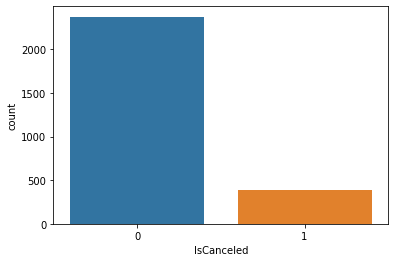

In [13]:
#Storing the label column name
label = 'IsCanceled'
#Create a list for columns with more than 5% and less than 50% missing
high_miss_cols = []
#Create a list for columns with more than 50% missing
very_high_miss_cols = []
#Create a list for columns with less or equal to 5% missing 
low_miss_cols = []
#Creating all the plots
np.set_printoptions(precision=3, suppress=True) #precision settings
sns.countplot(data=NoShow_f , x=label)
plt.show()

Year Type: category
Missing: 0 (0.0%)


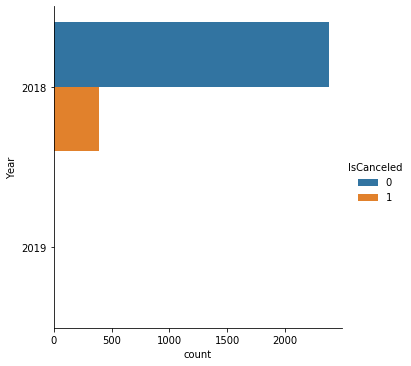

Season Type: category
Missing: 0 (0.0%)


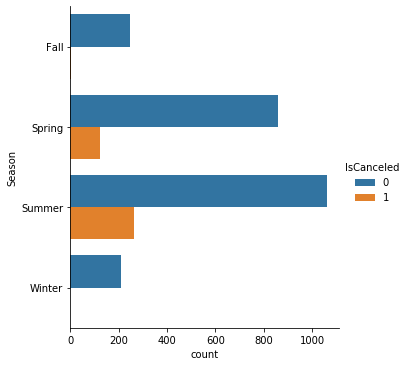

WeekEnd Type: category
Missing: 0 (0.0%)


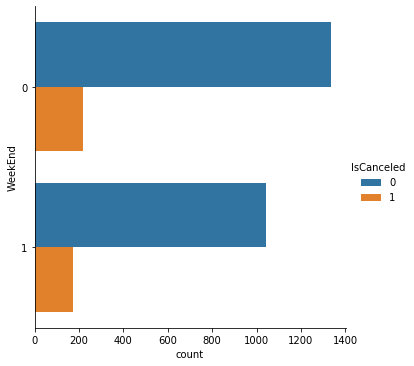

LastYear Type: category
Missing: 822 (29.739507959479017%)


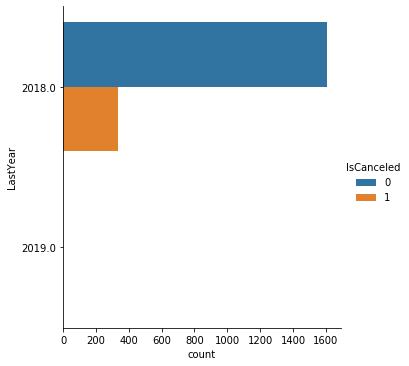

LastSeason Type: category
Missing: 822 (29.739507959479017%)


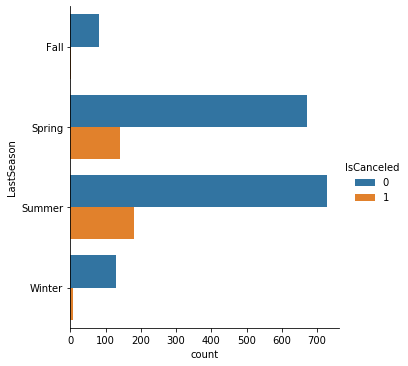

LastWeekEnd Type: category
Missing: 822 (29.739507959479017%)


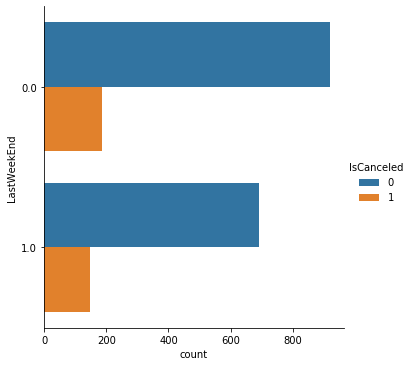

DaysRecency Type: float64
Missing: 822 (29.739507959479017%)
Mean: 27.842430484037074 (Std: 41.5583405128668)
Median: 8.0 
Min: 0.0 Max: 260.0


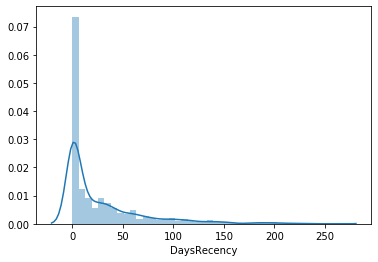

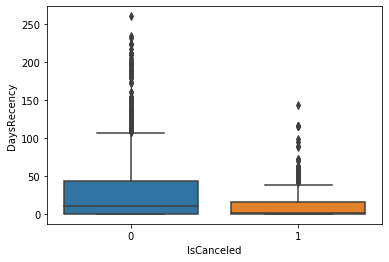

ClientType Type: category
Missing: 0 (0.0%)


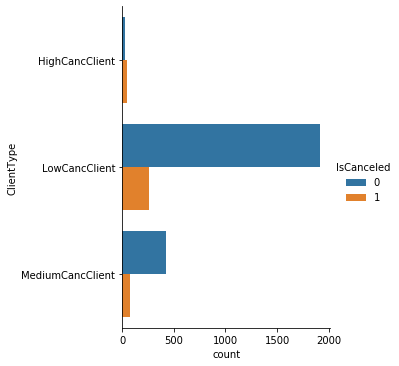

Staff Type: category
Missing: 0 (0.0%)


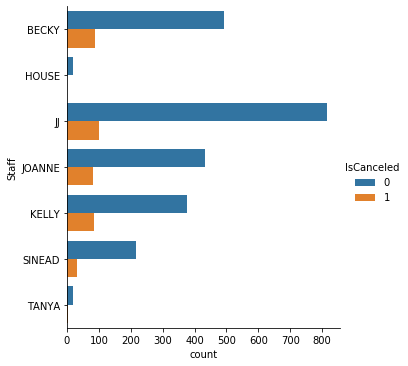

BLastStaff Type: category
Missing: 822 (29.739507959479017%)


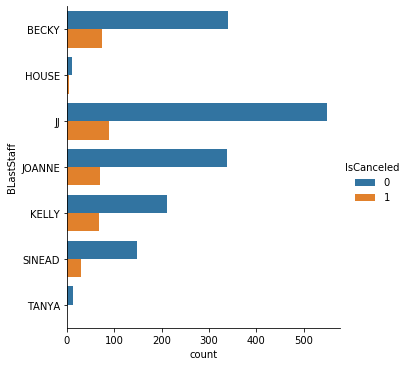

RTLastStaff Type: category
Missing: 1975 (71.45441389290883%)


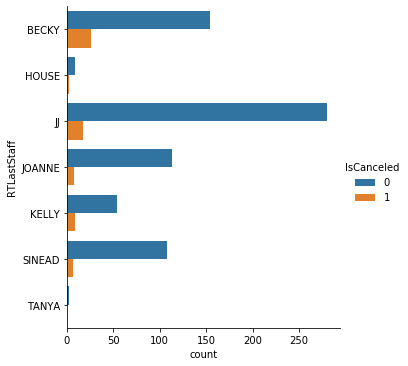

StaffCancType Type: category
Missing: 0 (0.0%)


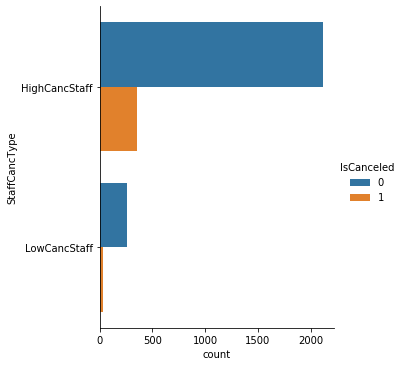

BLastServiceCode Type: category
Missing: 822 (29.739507959479017%)


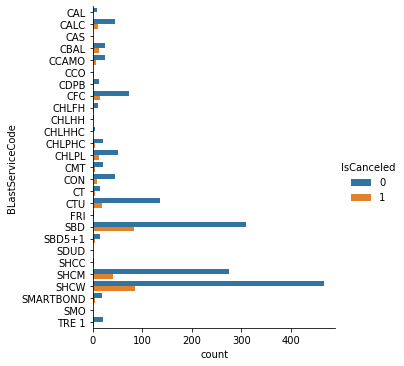

BLastWomenMenService Type: category
Missing: 822 (29.739507959479017%)


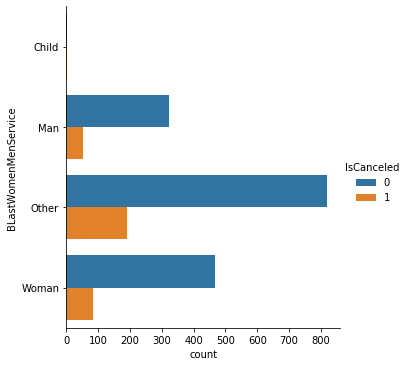

BLastColorCutService Type: category
Missing: 822 (29.739507959479017%)


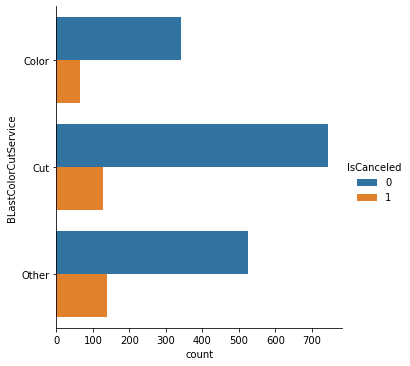

LastServiceCategory Type: category
Missing: 822 (29.739507959479017%)


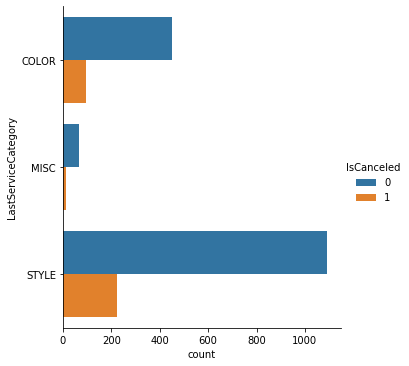

LastServicePrice Type: float64
Missing: 822 (29.739507959479017%)
Mean: 30.80226570545829 (Std: 46.5136551826508)
Median: 0.0 
Min: 0.0 Max: 300.0


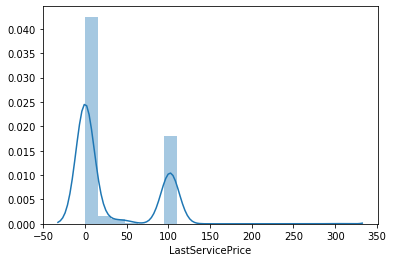

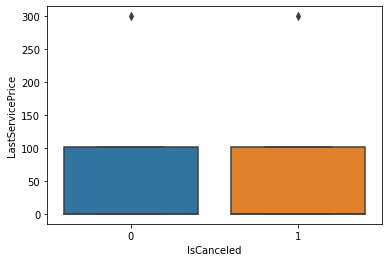

LastServiceCost Type: float64
Missing: 822 (29.739507959479017%)
Mean: 6.251287332646756 (Std: 2.5882340704292632)
Median: 5.0 
Min: 0.0 Max: 10.0


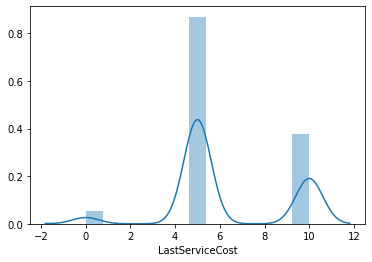

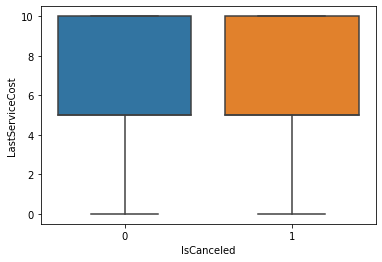

ServiceCode Type: category
Missing: 0 (0.0%)


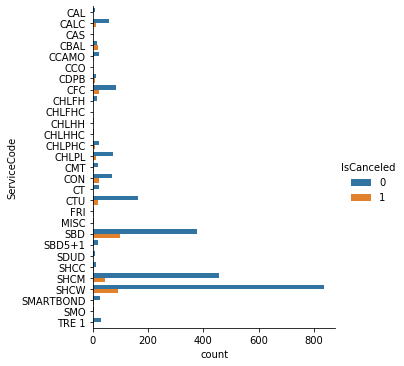

ServiceCancType Type: category
Missing: 0 (0.0%)


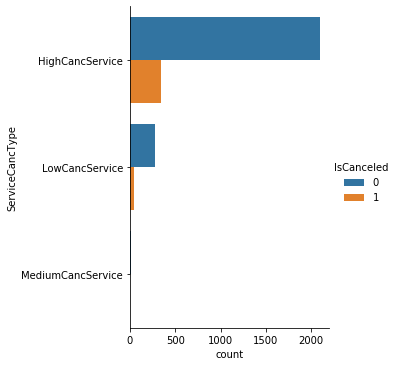

WomenMenService Type: category
Missing: 0 (0.0%)


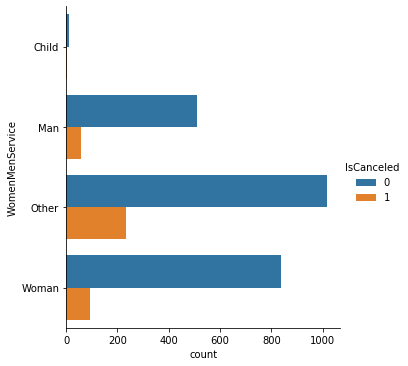

ColorCutService Type: category
Missing: 0 (0.0%)


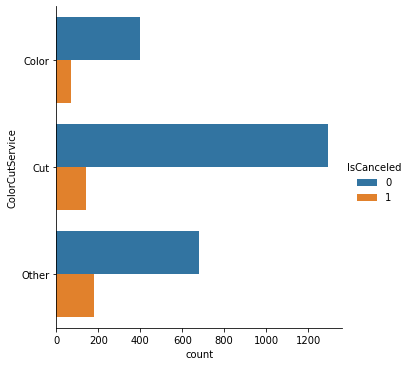

ServiceCategory Type: category
Missing: 0 (0.0%)


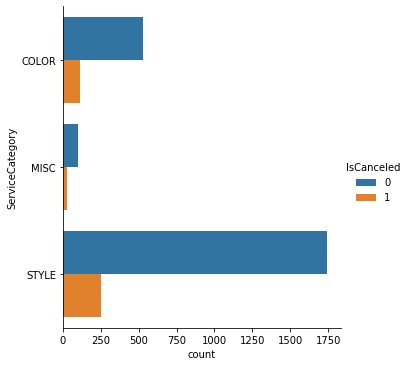

ServicePrice Type: float64
Missing: 0 (0.0%)
Mean: 36.358538350217074 (Std: 48.87350283624534)
Median: 0.0 
Min: 0.0 Max: 300.0


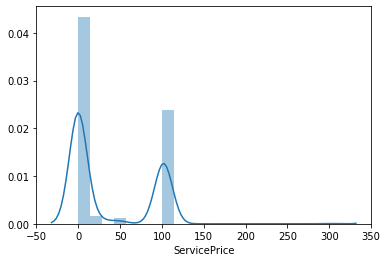

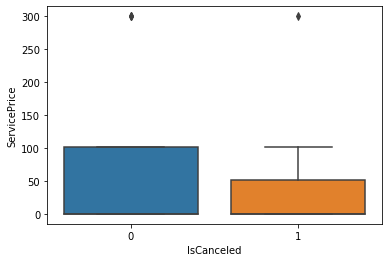

ServiceCost Type: float64
Missing: 0 (0.0%)
Mean: 6.000361794500724 (Std: 2.5024589671220525)
Median: 5.0 
Min: 0.0 Max: 10.0


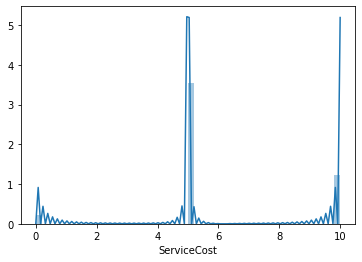

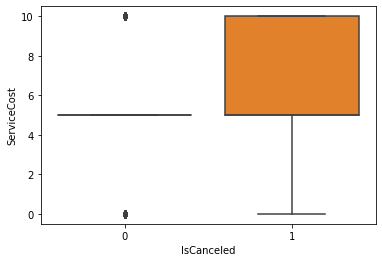

RTLastWomenMen Type: category
Missing: 1975 (71.45441389290883%)


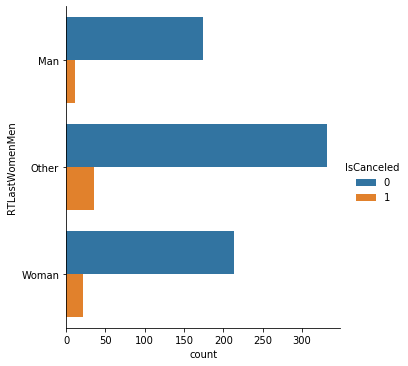

RTLastColorCutReciept Type: category
Missing: 1975 (71.45441389290883%)


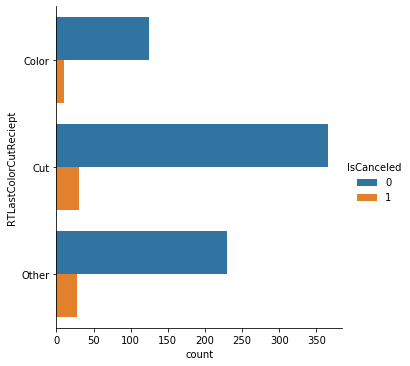

LastTotalAmount Type: float64
Missing: 1975 (71.45441389290883%)
Mean: 91.00380228136882 (Std: 68.69599262348707)
Median: 70.0 
Min: 0.0 Max: 350.0


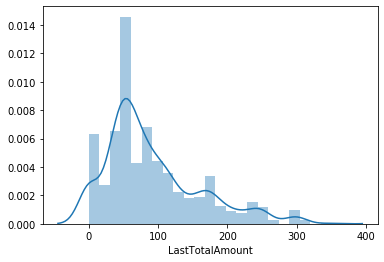

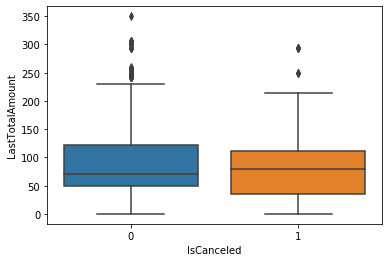

LastTotalGST Type: float64
Missing: 1975 (71.45441389290883%)
Mean: 9.808669835234493 (Std: 8.27022769043502)
Median: 8.0 
Min: 0.0 Max: 47.05


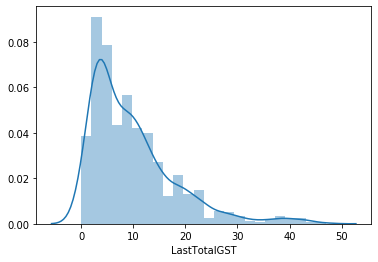

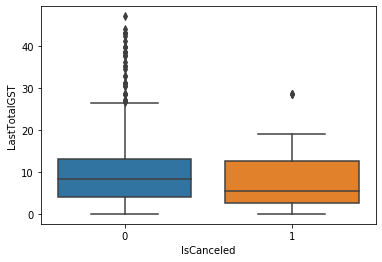

LastTotalPST Type: float64
Missing: 1975 (71.45441389290883%)
Mean: 15.693871736375156 (Std: 13.232364304696002)
Median: 12.8 
Min: 0.0 Max: 75.28


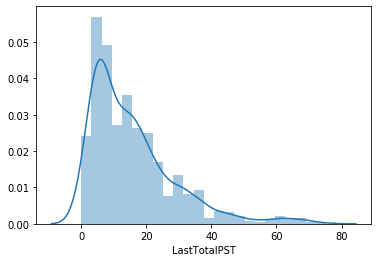

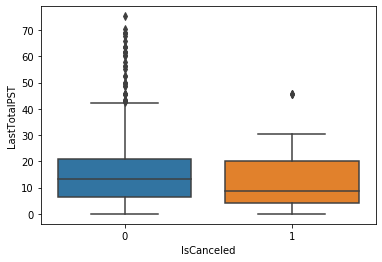

WasProdPerch Type: category
Missing: 1975 (71.45441389290883%)


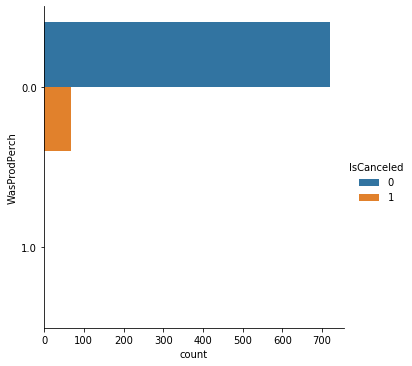

IsCanceled Type: category
Missing: 0 (0.0%)


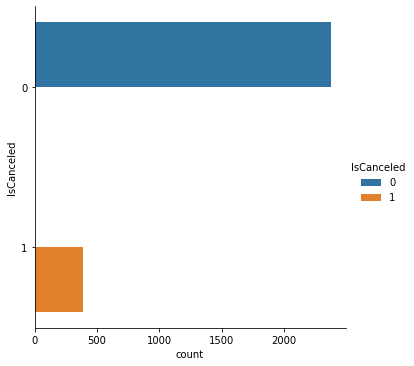

LastIsCanceled Type: category
Missing: 822 (29.739507959479017%)


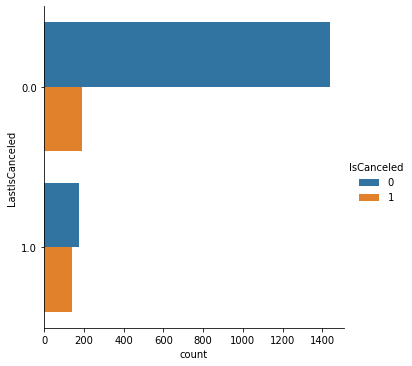

LastCanceledBy Type: category
Missing: 2476 (89.58031837916064%)


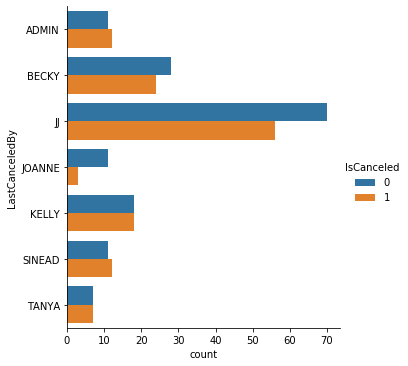

LastCancelWeekday Type: category
Missing: 2451 (88.67583212735167%)


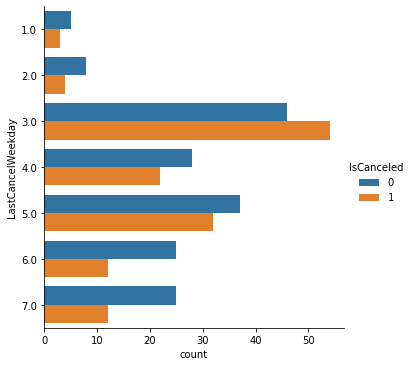

TotalClientCancellationsTillNow Type: float64
Missing: 822 (29.739507959479017%)
Mean: 1.247167868177137 (Std: 2.655596602998157)
Median: 0.0 
Min: 0.0 Max: 22.0


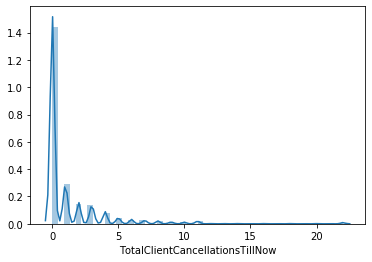

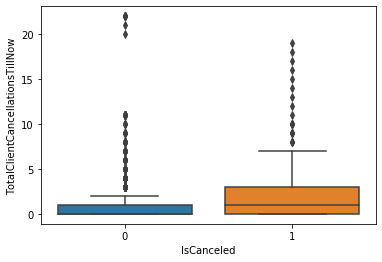

TotalClientBookingsTillNow Type: float64
Missing: 0 (0.0%)
Mean: 4.645441389290883 (Std: 6.7805302633182345)
Median: 2.0 
Min: 0.0 Max: 43.0


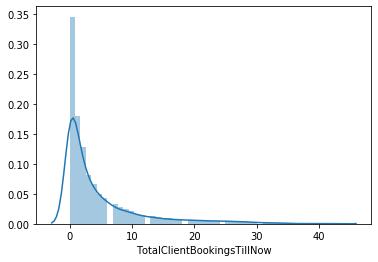

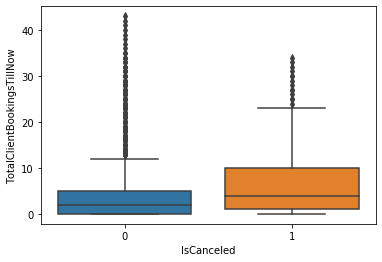

CancellationPcnt Type: float64
Missing: 822 (29.739507959479017%)
Mean: 0.13436713084817084 (Std: 0.23512827426674604)
Median: 0.0 
Min: 0.0 Max: 1.0


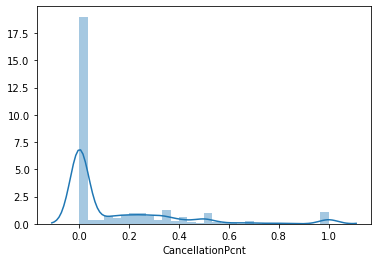

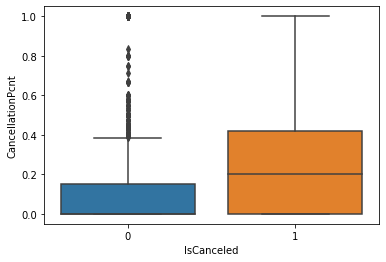

In [14]:
for column in NoShow_f.columns:
    var = NoShow_f[column]
    print (f'{column} Type: {var.dtype}')
    missing = var.isna().sum()
    total = len(var)
    if missing/total > 0.05 and missing/total <= 0.5:
        high_miss_cols.append(column)
    if missing/total <= 0.05:
        low_miss_cols.append(column)
    if missing/total > 0.5:
        very_high_miss_cols.append(column)
    print (f'Missing: {missing} ({missing/total*100}%)')
    if str(var.dtype) != 'category':
        mean = np.mean(var)
        median = np.median(var.dropna())
        std = np.std(var)
        minimum = np.min(var)
        maximum = np.max(var)
        print (f'Mean: {mean} (Std: {std})')
        print (f'Median: {median} ')
        print (f'Min: {minimum} Max: {maximum}')
        sns.distplot(var.dropna())
        plt.show()
        sns.boxplot(data=NoShow_f,x=label, y=column, orient="v")
        plt.show()
    else:
        sns.catplot(y=column, data=NoShow_f, hue=label, kind="count")
        plt.show()        

# Correlation matrix

In [15]:
# convert the label for the correlation matrix
NoShow_f["IsCanceled_int"]= NoShow_f[label].astype('int')

In [16]:
# calculate the correlation matrix - 
corr = NoShow_f.corr(method = 'spearman')
pd.set_option('display.max_columns', None)
corr

,DaysRecency,LastServicePrice,LastServiceCost,ServicePrice,ServiceCost,LastTotalAmount,LastTotalGST,LastTotalPST,TotalClientCancellationsTillNow,TotalClientBookingsTillNow,CancellationPcnt,IsCanceled_int
DaysRecency,1.000000,0.065222,-0.259312,0.149234,-0.389584,-0.083818,-0.239720,-0.239720,-0.198299,-0.287250,-0.171556,-0.147090
LastServicePrice,0.065222,1.000000,-0.288334,0.365413,0.023383,0.263551,0.003221,0.003221,-0.138927,-0.190297,-0.104682,-0.019536
LastServiceCost,-0.259312,-0.288334,1.000000,0.020343,0.343949,0.230646,0.135962,0.135962,0.006315,0.134932,0.003328,-0.004569
ServicePrice,0.149234,0.365413,0.020343,1.000000,-0.267243,0.209375,-0.027773,-0.027773,-0.123835,-0.250214,-0.078133,-0.074985
ServiceCost,-0.389584,0.023383,0.343949,-0.267243,1.000000,0.206208,0.085340,0.085340,-0.022091,0.176779,-0.025535,0.027625
LastTotalAmount,-0.083818,0.263551,0.230646,0.209375,0.206208,1.000000,0.410714,0.410714,-0.147829,0.061578,-0.122335,-0.018031
LastTotalGST,-0.239720,0.003221,0.135962,-0.027773,0.085340,0.410714,1.000000,1.000000,-0.011923,0.278020,-0.025305,-0.070163
LastTotalPST,-0.239720,0.003221,0.135962,-0.027773,0.085340,0.410714,1.000000,1.000000,-0.011923,0.278020,-0.025305,-0.070163
TotalClientCancellationsTillNow,-0.198299,-0.138927,0.006315,-0.123835,-0.022091,-0.147829,-0.011923,-0.011923,1.000000,0.605061,0.950493,0.238034
TotalClientBookingsTillNow,-0.287250,-0.190297,0.134932,-0.250214,0.176779,0.061578,0.278020,0.278020,0.605061,1.000000,0.447369,0.157828


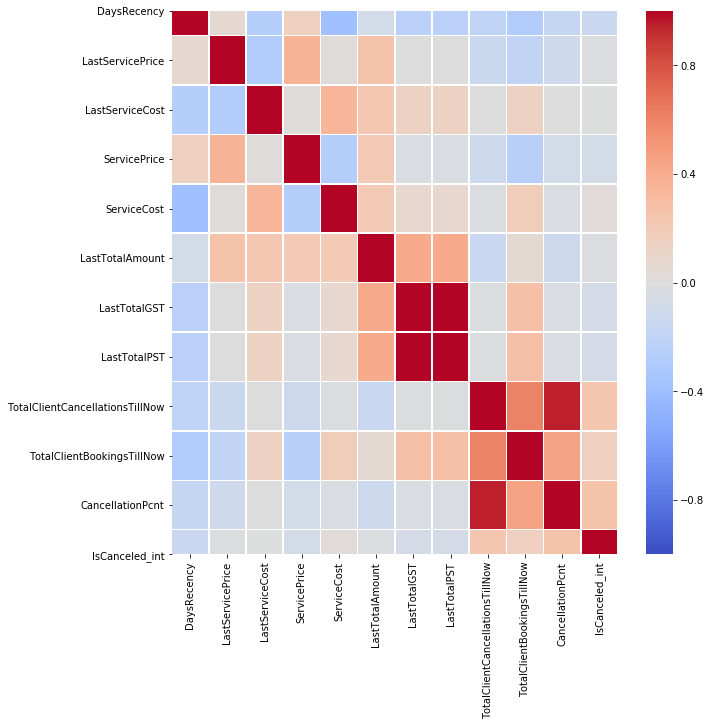

In [17]:
# plot the heatmap
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,linewidths=.5, ax=ax, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [18]:
NoShow_f = NoShow_f.drop("IsCanceled_int", axis=1)

### There is a high correlation between "TotalClientCancellationsTillNow","TotalClientBookingsTillNow" and "CancellationPcnt"."CancellationPcnt", "TotalClientCancellationsTillNow" have the higher correlation with our target.

# Outliers

In [19]:
def is_outlier (series,iqr_const=3):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    return np.abs(series-series.median())>(iqr_const*iqr)

In [20]:
cols_with_outliers = []
for column in NoShow_f.columns:
    var = NoShow_f[column].dropna()
    if str(var.dtype) != 'category':
        sum_outlier = is_outlier(var).sum()
        #print(f'sum : {sum_outlier}')
        if sum_outlier>1:
            cols_with_outliers.append(column)

In [21]:
# This is the list of columns that have outliers
cols_with_outliers

['DaysRecency',
 'ServiceCost',
 'LastTotalAmount',
 'LastTotalGST',
 'LastTotalPST',
 'TotalClientCancellationsTillNow',
 'TotalClientBookingsTillNow',
 'CancellationPcnt']

## First, we will check if the outliers affect the assumptions, using t-test:

DaysRecency


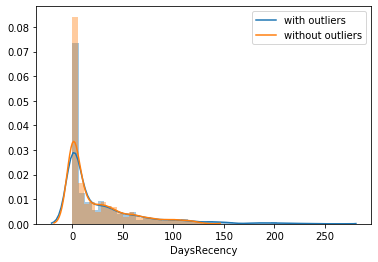

p-value:7.780621228842413e-07
-------------------------
ServiceCost


C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


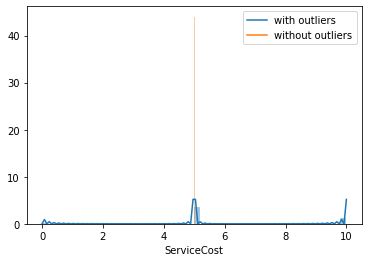

p-value:6.432727472602024e-68
-------------------------
LastTotalAmount


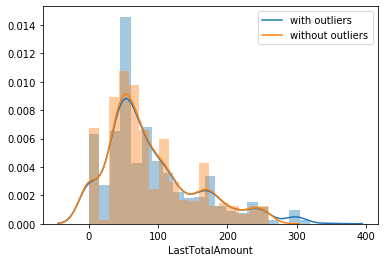

p-value:0.18951967774137873
-------------------------
LastTotalGST


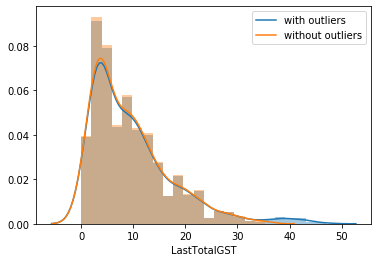

p-value:0.1016587455437131
-------------------------
LastTotalPST


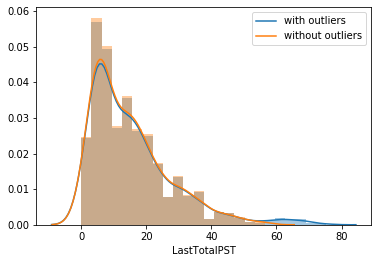

p-value:0.10165874554371482
-------------------------
TotalClientCancellationsTillNow


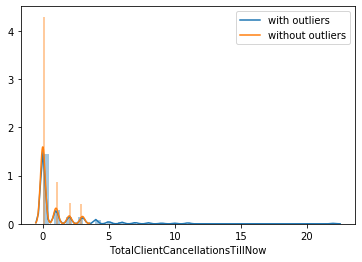

p-value:9.268046737297527e-29
-------------------------
TotalClientBookingsTillNow


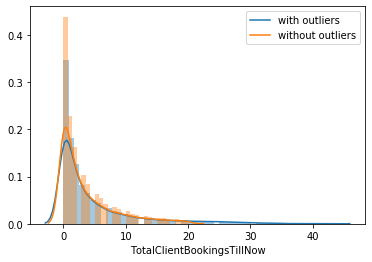

p-value:2.8052214655885795e-13
-------------------------
CancellationPcnt


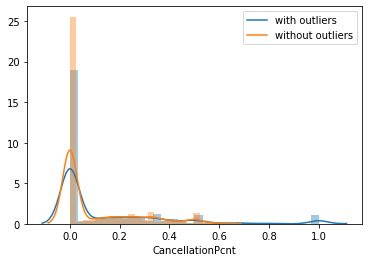

p-value:5.496463594211076e-10
-------------------------


In [22]:
#for 'cols_with_outliers', we check the significance of the difference in distributions between with and without outliers.
#only columns with significant diffenerce will be included in the list 'ttest_signi'.
P_VALUE = 0.045 #threshold for t-test
ttest_signi = []
for column in cols_with_outliers:
    col_data = NoShow_f[column].dropna()
    col_data_no_outliers = col_data[~is_outlier(col_data)]
    print (f'{column}')
    sns.distplot(col_data, hist=True, kde_kws = {'label':'with outliers'})
    sns.distplot(col_data_no_outliers, hist=True, kde_kws = {'label':'without outliers'})
    plt.show()
    t, p = ttest_ind(col_data, col_data_no_outliers, equal_var=True)
    print (f'p-value:{p}\n-------------------------')
    if p < P_VALUE:
        ttest_signi.append(column)

In [23]:
ttest_not_signi = [col for col in cols_with_outliers if col not in ttest_signi]

## Create a copy for the cleaning part:

In [24]:
NoShow = NoShow_f.copy()

## These are the variables whose outliers does not affect the assumptions:


In [25]:
ttest_not_signi

['LastTotalAmount', 'LastTotalGST', 'LastTotalPST']

### In the EDA we saw that these variables have more than 70% of missing, we will probably drop them anyway (in the missing treatment part).

## These are the variables whose outliers affect the assumptions: 

In [26]:
ttest_signi

['DaysRecency',
 'ServiceCost',
 'TotalClientCancellationsTillNow',
 'TotalClientBookingsTillNow',
 'CancellationPcnt']

## For the variables in ttest_signi ,we wil check if the outliers affect the results as well:

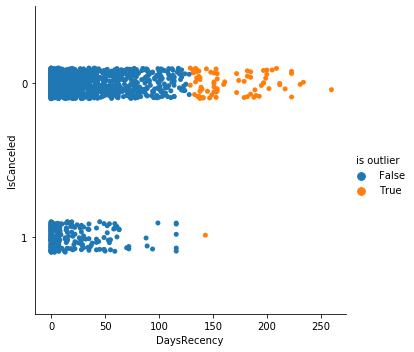

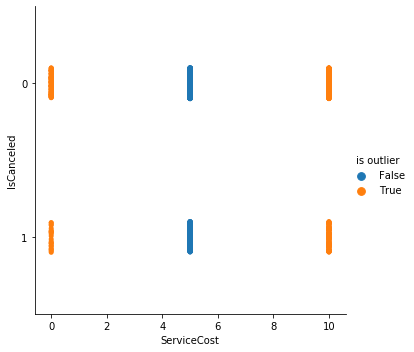

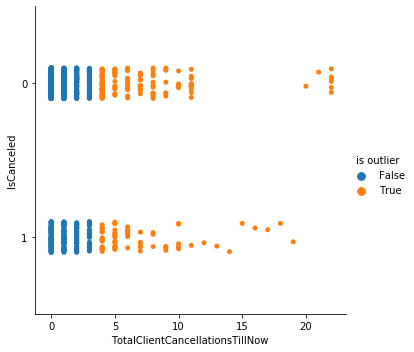

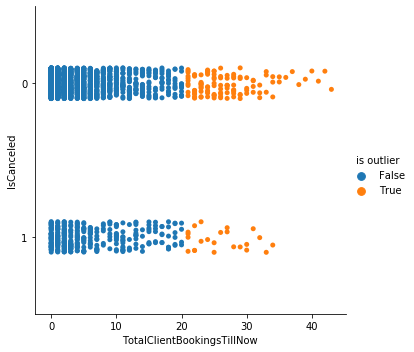

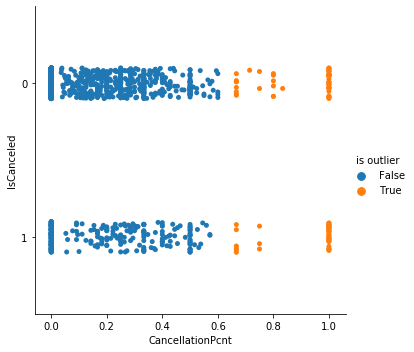

In [27]:
for column in ttest_signi:
    df_col = pd.DataFrame()
    df_col[column] =NoShow_f[column]
    df_col[label] =NoShow_f[label]
    df_col['is outlier'] =is_outlier(NoShow_f[column])
    
    sns.catplot(x=column, y=label, hue='is outlier', data=df_col)
    plt.show()

### No variables whose outliers affect both the assumptions and the results were found.

### The variables whose outliers affect the assumptions but not the results:
#### "DaysRecency","TotalClientCancellationsTillNow","TotalClientBookingsTillNow","CancellationPcnt", "ServiceCost"
#### "DaysRecency","TotalClientCancellationsTillNow" - already contains nearly 30% of NULLs which represent new clients. It will be categorized in the Missingness treatment part.
#### "CancellationPcnt" - is between 0 and 1. We can see the is_outlier function tagged values => 0.65 as outliers. Seems like we need to use a higher iqr factor for this particular variable to detect outliers.
#### For all those reasons, we will treat now only outliers of "TotalClientBookingsTillNow", "ServiceCost".
 

In [28]:
aff_assum = ["TotalClientBookingsTillNow","ServiceCost"]

## Outlier treatment

#### aff_assum = Treatment: replace with NULL.

In [29]:
#Replaces outliers with NA
def outlier_replace_wt_null (col, df):
    col_data = df[col].dropna()
    col_data[is_outlier(col_data)]=np.nan
    return col_data   

In [30]:
NoShow[aff_assum] = outlier_replace_wt_null(aff_assum, NoShow) 

#### "CancellationPcnt"

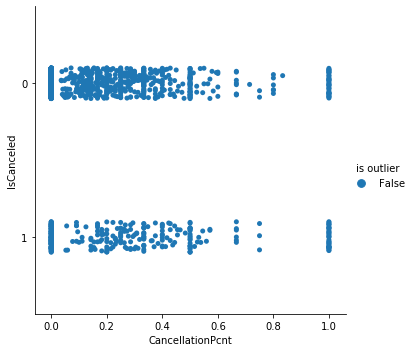

In [31]:
df_col = pd.DataFrame()
df_col["CancellationPcnt"] =NoShow_f["CancellationPcnt"]
df_col[label] =NoShow_f[label]
df_col['is outlier'] =is_outlier(NoShow_f["CancellationPcnt"],5)
sns.catplot(x="CancellationPcnt", y=label, hue='is outlier', data=df_col)
plt.show()

# Missing

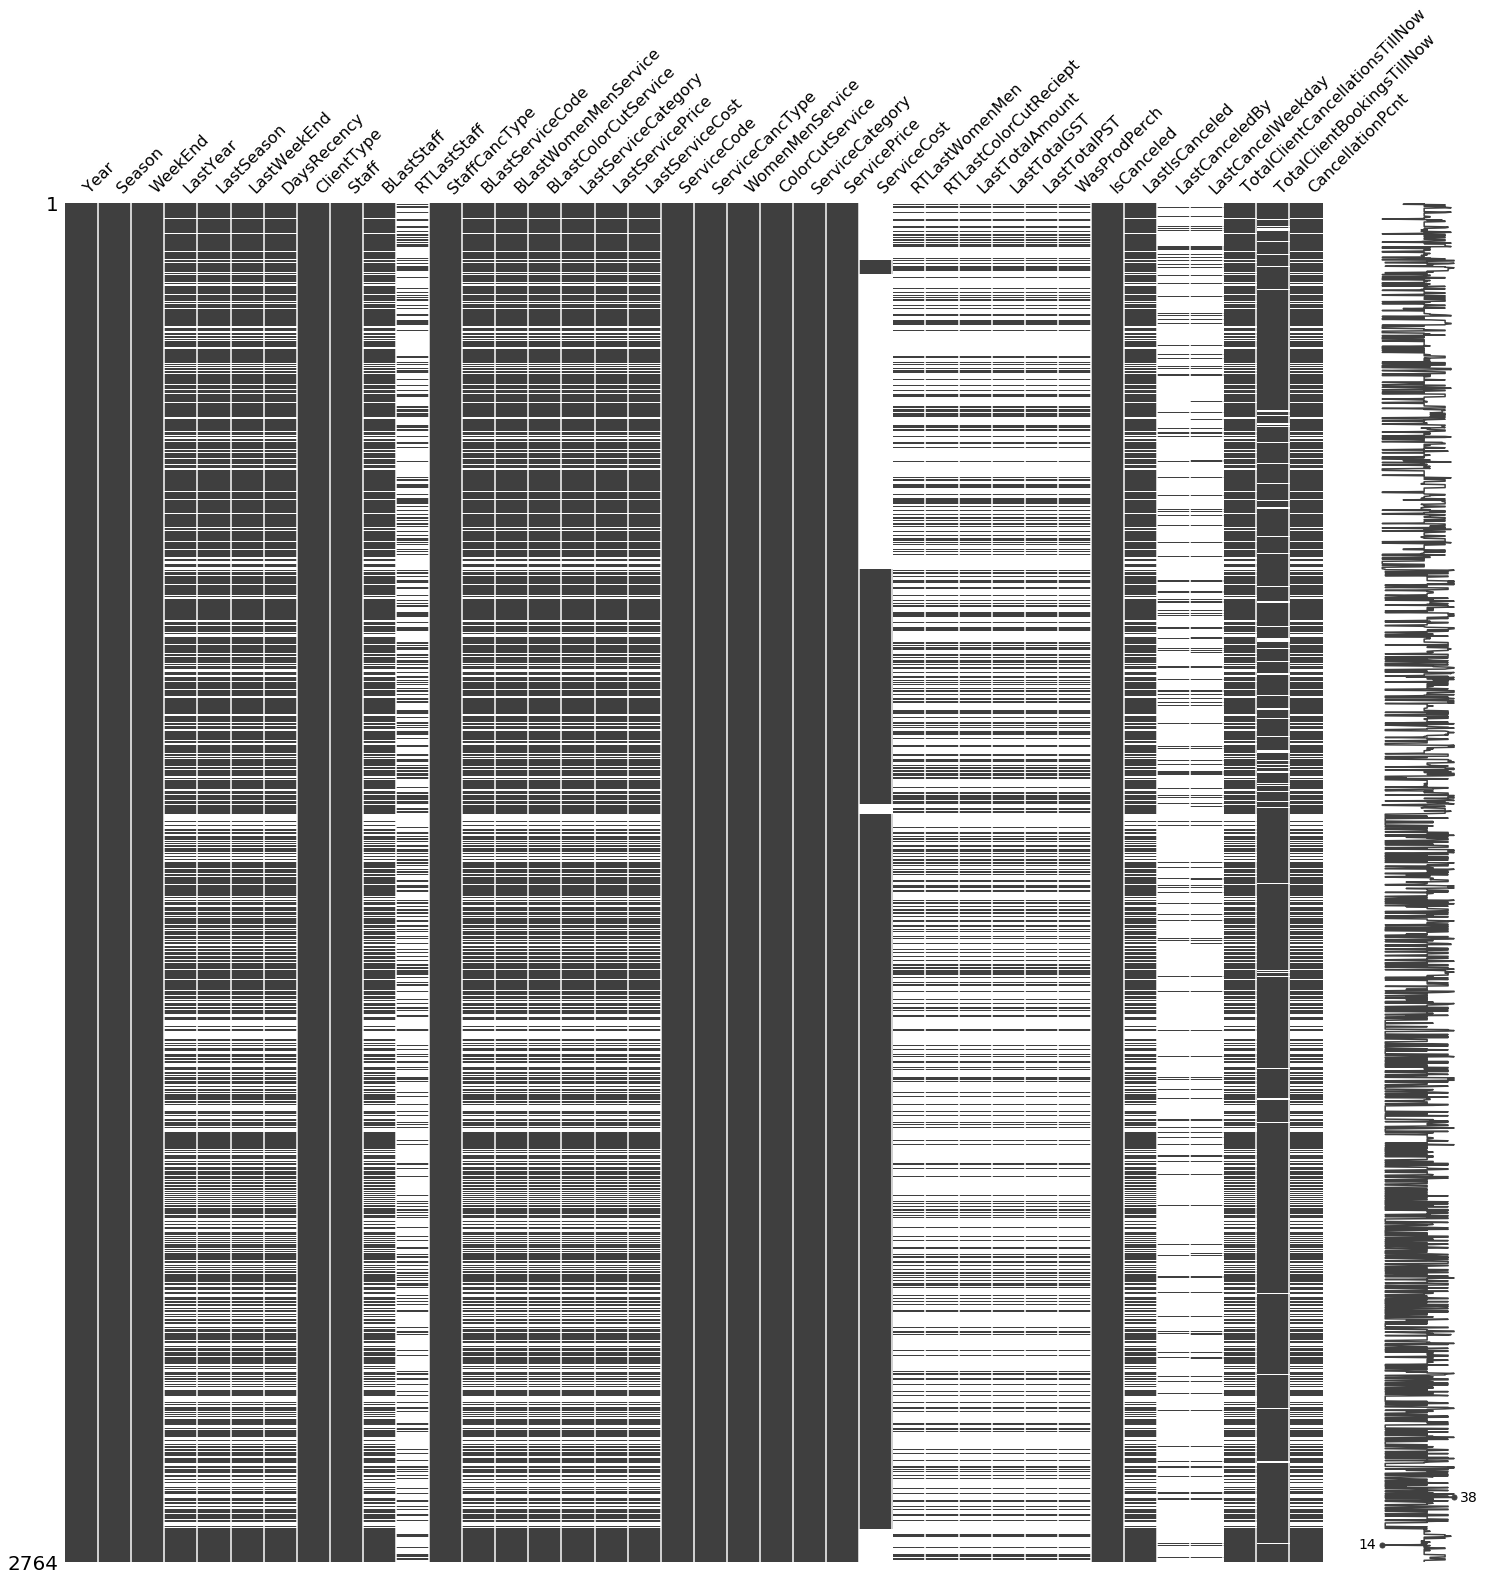

In [32]:
msno.matrix(NoShow,figsize=(25,25))

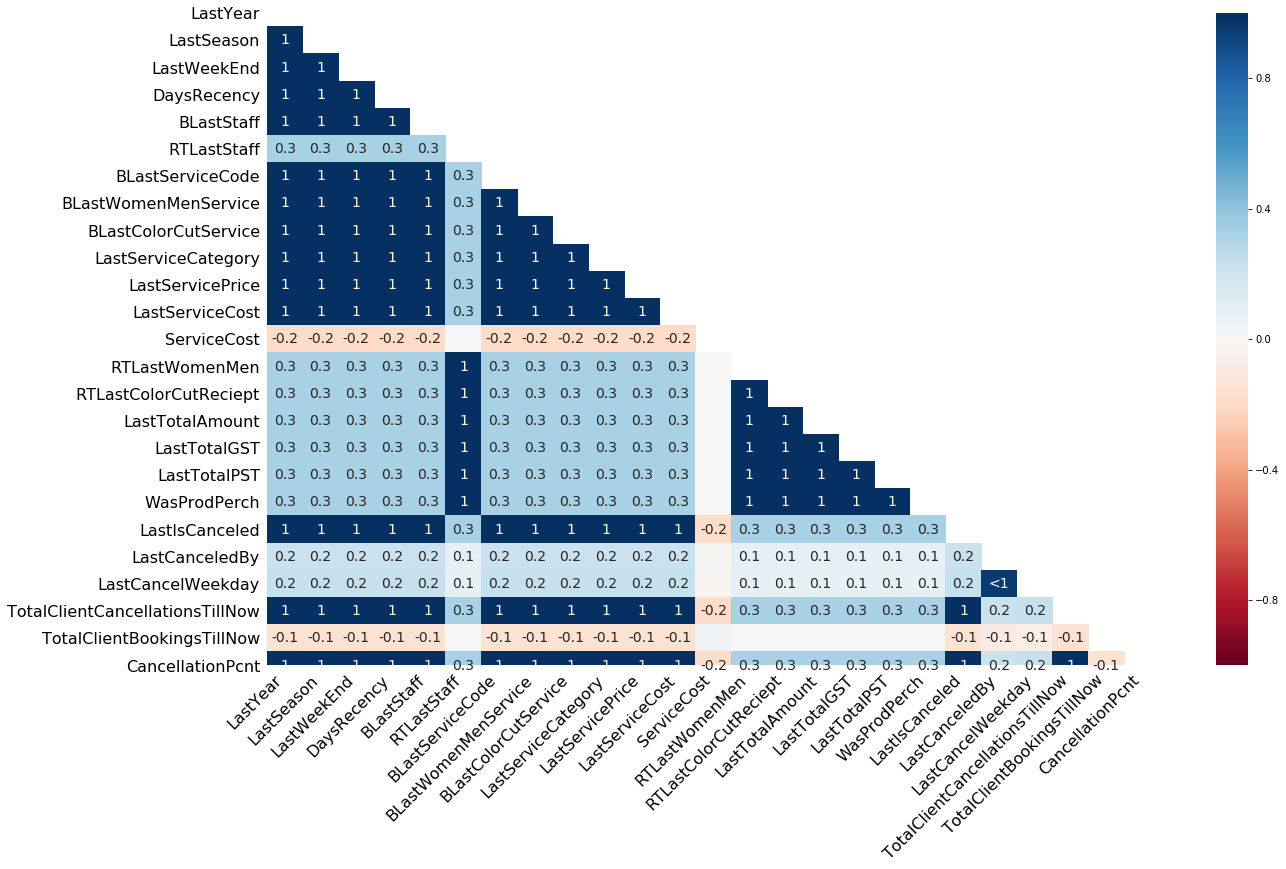

In [33]:
msno.heatmap(NoShow)

## Missing treatment:

### The variables can be divided into several groups:
#### very_high_miss_cols = From the EDA, it's over 70% missing -> Treatment: Drop the variable.
#### high_miss_cols = 30% missing (same percent for all) - All those variables have MNAR type of missing: if there were no visits in the hair salon for this client, in other words - this is a new client, all those variables are NULL-> Treatment: Categorization.

In [34]:
NoShow = NoShow.drop(very_high_miss_cols , axis=1)

#### Those variables will be categorized:

In [35]:
high_miss_cols

['LastYear',
 'LastSeason',
 'LastWeekEnd',
 'DaysRecency',
 'BLastStaff',
 'BLastServiceCode',
 'BLastWomenMenService',
 'BLastColorCutService',
 'LastServiceCategory',
 'LastServicePrice',
 'LastServiceCost',
 'LastIsCanceled',
 'TotalClientCancellationsTillNow',
 'CancellationPcnt']

In [36]:
[f'col: {col} {NoShow[col].unique()}' for col in high_miss_cols]

['col: LastYear [2018.0, NaN, 2019.0]\nCategories (2, float64): [2018.0, 2019.0]',
 'col: LastSeason [Summer, NaN, Winter, Fall, Spring]\nCategories (4, object): [Summer, Winter, Fall, Spring]',
 'col: LastWeekEnd [1.0, NaN, 0.0]\nCategories (2, float64): [1.0, 0.0]',
 'col: DaysRecency [  0.  nan  40.  60. 154.  62.  24.  37.  29.   1. 101.  63.   7.  43.\n 161.  35.  71.  28.   6.  36.  58.  55.  34.  11. 153.  69.  75.  70.\n  20.   8.  14.   3.  79.  15.  30.  12.  10.  42.  82. 116. 118.  27.\n  22.  19.   5. 151. 143.  61.   4.   2.  72. 174.  23. 112. 172.  66.\n  13.  18.  96.  17. 113. 132.  16.  54.  88.  21.  48. 135.  94. 128.\n 212.  56.  26.  49.  25.  68.  59. 182.  41.  46.  89.  32. 114. 108.\n  57. 140.  87. 134.   9.  74.  67. 199.  45. 111.  52. 189.  47.  98.\n  50.  77.  33.  73.  80. 125. 124.  76.  85. 106.  90.  38. 119. 136.\n 105.  99. 117.  78.  51. 145. 129.  44. 102. 195. 137.  84.  31. 100.\n 109. 148. 121. 160.  64.  65.  39. 193. 104. 123. 149. 133. 103

In [37]:
for column in high_miss_cols:
    var = NoShow[column]
    if str(var.dtype) == 'category':
        var.cat.add_categories(['NewClient'], inplace=True)
        var.fillna('NewClient', inplace=True)
    else:
        num_of_cat = 5
        bins = np.unique([np.quantile(var.dropna(),quantile/num_of_cat) for quantile in range(0,num_of_cat+1)])
        categories = [f'{bins[index]:.2f}-{bins[index+1]:.2f}' for index in range(0,len(bins)-1)]
        NoShow[f'{column}_cat'] = pd.cut(NoShow[column], bins, labels=categories).astype('category')
        NoShow[f'{column}_cat'].cat.add_categories(['NewClient'], inplace=True)
        NoShow[f'{column}_cat'].fillna('NewClient', inplace=True)
        NoShow.drop(column, inplace=True, axis=1)

In [38]:
NoShow.head(20)

,Year,Season,WeekEnd,LastYear,LastSeason,LastWeekEnd,ClientType,Staff,BLastStaff,StaffCancType,BLastServiceCode,BLastWomenMenService,BLastColorCutService,LastServiceCategory,ServiceCode,ServiceCancType,WomenMenService,ColorCutService,ServiceCategory,ServicePrice,ServiceCost,IsCanceled,LastIsCanceled,TotalClientBookingsTillNow,DaysRecency_cat,LastServicePrice_cat,LastServiceCost_cat,TotalClientCancellationsTillNow_cat,CancellationPcnt_cat
0,2018,Summer,1,2018,Summer,1,LowCancClient,JOANNE,JOANNE,HighCancStaff,CAL,Other,Other,COLOR,CAL,LowCancService,Other,Other,COLOR,0.0,NaN,0,0,7.0,NewClient,NewClient,5.00-10.00,NewClient,NewClient
1,2018,Summer,1,2018,Summer,1,LowCancClient,JOANNE,BECKY,HighCancStaff,SHCW,Woman,Cut,STYLE,CAL,LowCancService,Other,Other,COLOR,0.0,NaN,0,0,5.0,NewClient,0.00-102.00,0.00-5.00,NewClient,NewClient
2,2018,Summer,1,NewClient,NewClient,NewClient,LowCancClient,JOANNE,NewClient,HighCancStaff,NewClient,NewClient,NewClient,NewClient,CAL,LowCancService,Other,Other,COLOR,0.0,NaN,0,NewClient,0.0,NewClient,NewClient,NewClient,NewClient,NewClient
3,2018,Summer,0,2018,Summer,0,LowCancClient,JOANNE,JJ,HighCancStaff,SHCW,Woman,Cut,STYLE,CAL,LowCancService,Other,Other,COLOR,0.0,NaN,0,0,3.0,NewClient,0.00-102.00,0.00-5.00,NewClient,NewClient
4,2018,Summer,0,2018,Summer,0,LowCancClient,JOANNE,JOANNE,HighCancStaff,CAL,Other,Other,COLOR,CAL,LowCancService,Other,Other,COLOR,0.0,NaN,0,0,4.0,NewClient,NewClient,5.00-10.00,NewClient,NewClient
5,2018,Winter,1,2018,Winter,1,LowCancClient,JOANNE,JJ,HighCancStaff,SHCW,Woman,Cut,STYLE,CAL,LowCancService,Other,Other,COLOR,0.0,NaN,0,0,3.0,NewClient,0.00-102.00,0.00-5.00,NewClient,NewClient
6,2018,Winter,1,2018,Winter,1,LowCancClient,JOANNE,JOANNE,HighCancStaff,CAL,Other,Other,COLOR,CAL,LowCancService,Other,Other,COLOR,0.0,NaN,0,0,4.0,NewClient,NewClient,5.00-10.00,NewClient,NewClient
7,2018,Summer,1,2018,Summer,1,LowCancClient,JOANNE,JJ,HighCancStaff,SHCM,Man,Cut,STYLE,CAL,LowCancService,Other,Other,COLOR,0.0,NaN,0,0,6.0,NewClient,NewClient,0.00-5.00,NewClient,NewClient
8,2018,Summer,1,2018,Summer,1,LowCancClient,JOANNE,JOANNE,HighCancStaff,CAL,Other,Other,COLOR,CAL,LowCancService,Other,Other,COLOR,0.0,NaN,0,0,8.0,NewClient,NewClient,5.00-10.00,NewClient,NewClient
9,2018,Summer,0,2018,Summer,1,MediumCancClient,JOANNE,JOANNE,HighCancStaff,CHLPL,Other,Other,COLOR,CAL,LowCancService,Other,Other,COLOR,0.0,NaN,0,1,1.0,19.00-50.00,NewClient,5.00-10.00,0.00-2.00,0.27-1.00


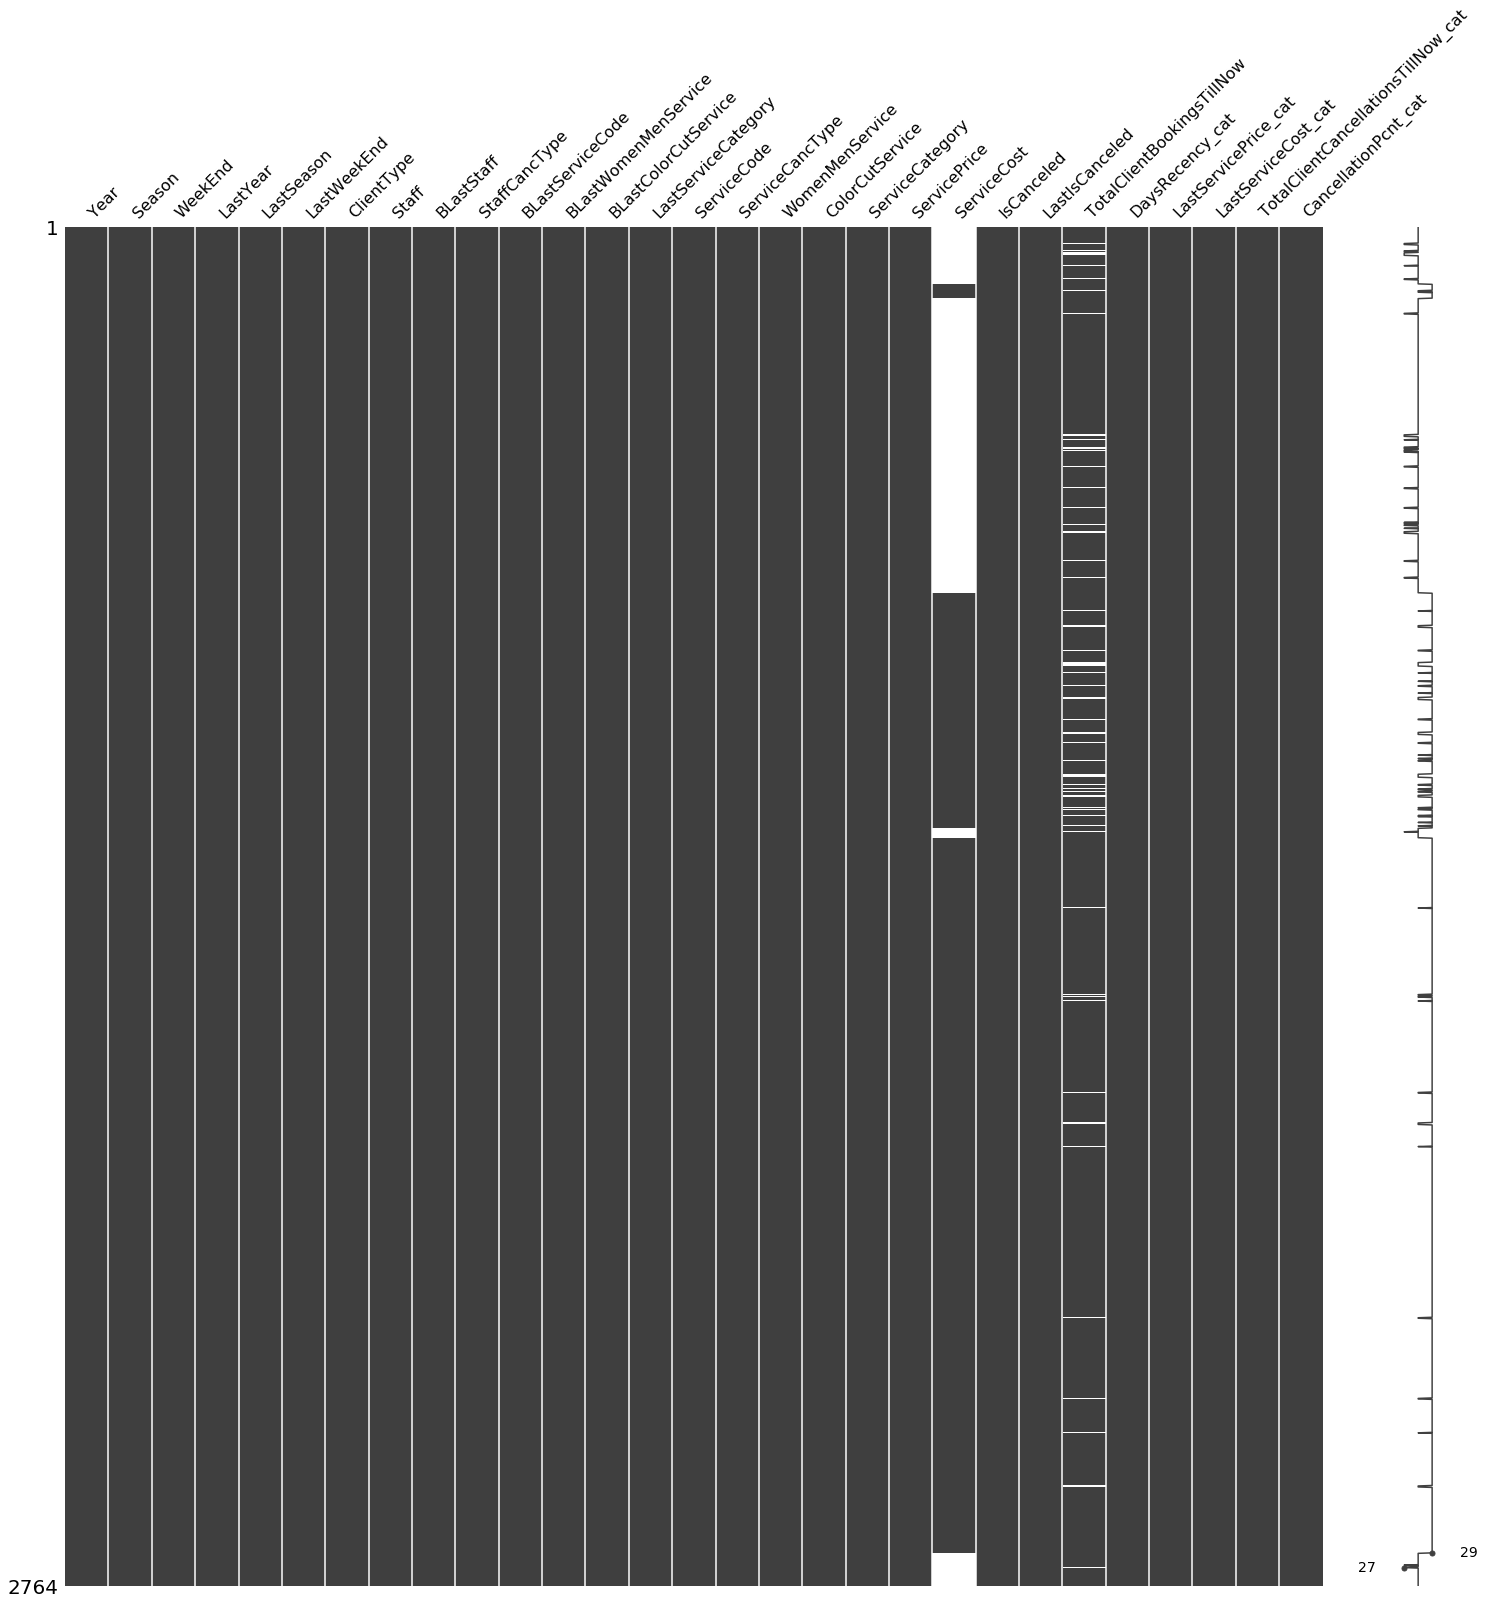

In [39]:
msno.matrix(NoShow,figsize=(25,25))

### According to this matrix, after the treatments we have performed there are only 2 variables with lots of missings-"ServiceCost", "TotalClientBookingsTillNow" and these are actually our previous outliers.
### Treatment: Categorization:

In [40]:
for column in ["ServiceCost", "TotalClientBookingsTillNow"]:
        num_of_cat = 5
        bins = np.unique([np.quantile(var.dropna(),quantile/num_of_cat) for quantile in range(0,num_of_cat+1)])
        categories = [f'{bins[index]:.2f}-{bins[index+1]:.2f}' for index in range(0,len(bins)-1)]
        NoShow[f'{column}_cat'] = pd.cut(NoShow[column], bins, labels=categories).astype('category')
        if column == "TotalClientBookingsTillNow" :
            NoShow[f'{column}_cat'].cat.add_categories(['NewClient'], inplace=True)
            NoShow[f'{column}_cat'].fillna('NewClient', inplace=True)
        else:
            NoShow[f'{column}_cat'].cat.add_categories(['Unknown'], inplace=True)
            NoShow[f'{column}_cat'].fillna('Unknown', inplace=True)
        NoShow.drop(column, inplace=True, axis=1)

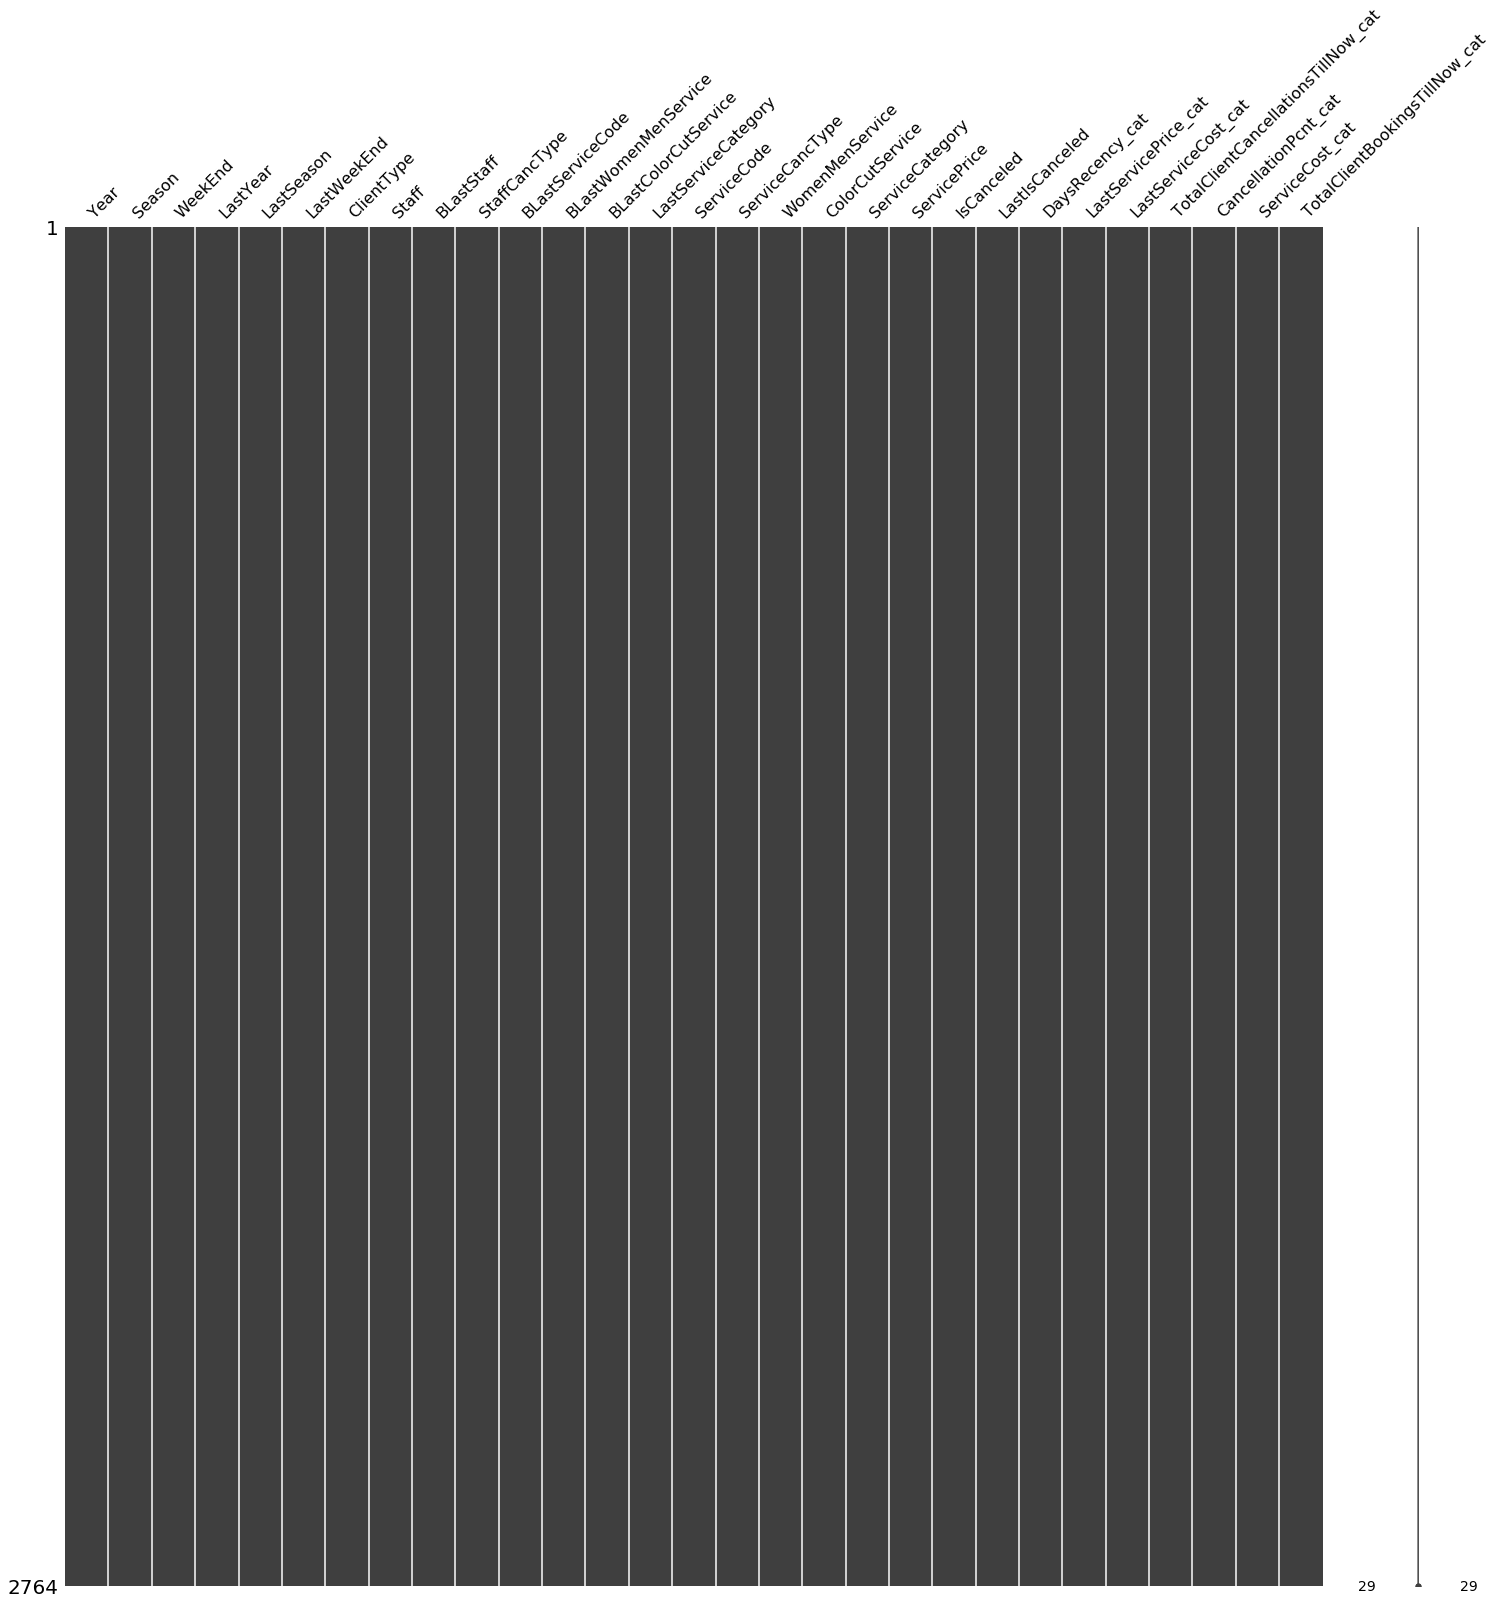

In [41]:
msno.matrix(NoShow,figsize=(25,25))

In [42]:
NoShow.to_pickle ('NoShow_Clean.pkl')